In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('darkgrid')
plt.style.use('tableau-colorblind10')
color = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 
         'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']

In [2]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report, roc_auc_score, roc_curve, auc
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler, LabelEncoder

C:\Users\Admin\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Admin\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Admin\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Admin\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passi

In [3]:
df_train = pd.read_csv('train.csv')
df_train

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,gender,age,marital_status_maried(Y/N),number_of_dependences,...,year_graduated,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,Best Performance
0,JG04,1.352775,PG03,1.352775,1.732051,RM_type_A,2,1985,Y,1,...,2011,4,2,3,2,3,0,46.37,0.0,0
1,JG04,1.292285,PG03,1.292285,1.039230,RM_type_A,2,1989,Y,0,...,2007,4,4,3,0,0,1,47.68,0.0,0
2,JG05,2.565151,PG06,2.308679,1.780449,RM_type_C,1,1970,Y,1,...,1989,28,10,9,6,2,1,40.73,0.0,0
3,JG05,2.828427,PG06,1.000000,1.385641,RM_type_A,2,1967,Y,2,...,1987,29,11,6,0,4,10,47.42,0.0,1
4,JG05,2.828427,PG06,2.828427,0.707107,RM_type_A,2,1965,Y,3,...,1985,30,9,8,2,3,0,47.18,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11148,JG04,1.256981,PG03,1.256981,1.224745,RM_type_A,2,1986,Y,1,...,2016,4,3,3,0,4,1,50.87,0.0,0
11149,JG04,1.385641,PG03,1.385641,1.802776,RM_type_B,1,1988,Y,2,...,2015,3,1,2,0,6,0,79.91,0.0,0
11150,JG04,1.256981,PG03,1.256981,1.385641,RM_type_B,2,1991,Y,0,...,2017,2,1,2,0,4,0,78.38,0.0,0
11151,JG04,1.118034,PG03,1.118034,0.000000,RM_type_A,1,1987,Y,1,...,2012,5,5,4,0,4,1,85.94,1.0,0


In [4]:
df_train.isnull().sum()

job_level                                0
job_duration_in_current_job_level        0
person_level                             0
job_duration_in_current_person_level     0
job_duration_in_current_branch           0
Employee_type                            0
gender                                   0
age                                      0
marital_status_maried(Y/N)               0
number_of_dependences                    0
Education_level                          0
GPA                                      0
year_graduated                           0
job_duration_from_training               0
branch_rotation                          0
job_rotation                             0
assign_of_otherposition                  0
annual leave                             0
sick_leaves                              0
Last_achievement_%                       1
Achievement_above_100%_during3quartal    1
Best Performance                         0
dtype: int64

In [5]:
df_train.loc[df_train['Last_achievement_%'].isnull()]

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,gender,age,marital_status_maried(Y/N),number_of_dependences,...,year_graduated,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,Best Performance
1882,JG04,1.292285,PG03,1.292285,0.911043,RM_type_A,1,1991,N,0,...,2012,5,4,5,0,1,15,NaN,NaN,0


In [6]:
df_train.loc[df_train['Achievement_above_100%_during3quartal'].isnull()]

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,gender,age,marital_status_maried(Y/N),number_of_dependences,...,year_graduated,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,Best Performance
1882,JG04,1.292285,PG03,1.292285,0.911043,RM_type_A,1,1991,N,0,...,2012,5,4,5,0,1,15,NaN,NaN,0


## Drop Null Values

In [7]:
df_train.shape

(11153, 22)

In [8]:
df_train.dropna(inplace=True)

In [9]:
df_train.shape

(11152, 22)

## Checking Duplicate

In [10]:
df_train[df_train.duplicated()]

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,gender,age,marital_status_maried(Y/N),number_of_dependences,...,year_graduated,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,Best Performance


## Manipulate `GPA` Column

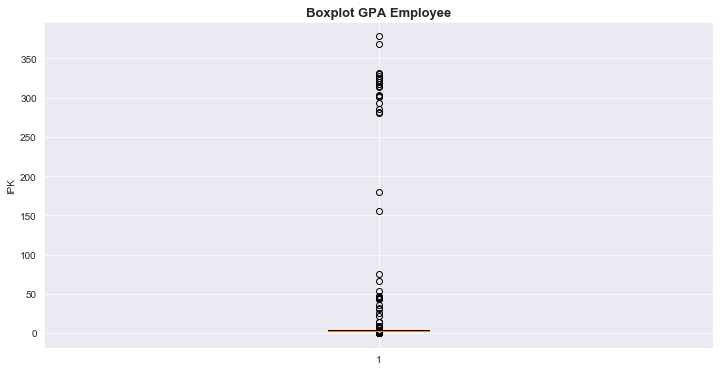

In [11]:
plt.figure(figsize=(12,6))
plt.title('Boxplot GPA Employee', fontsize=13, fontweight='bold')
plt.boxplot(df_train['GPA'])
plt.ylabel('IPK')
plt.show()

In [12]:
normal_gpa = df_train[(df_train['GPA']<=4.00) & (df_train['GPA']>0.5)]
normal_gpa['GPA'].describe()

count    8951.000000
mean        3.160937
std         0.242433
min         2.000000
25%         3.000000
50%         3.140000
75%         3.310000
max         3.970000
Name: GPA, dtype: float64

In [13]:
wrong_gpa = df_train[(df_train['GPA']>4.00) | (df_train['GPA']<0.5)]
wrong_gpa['GPA'].describe()

count    2201.000000
mean        3.238378
std        29.989234
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       378.000000
Name: GPA, dtype: float64

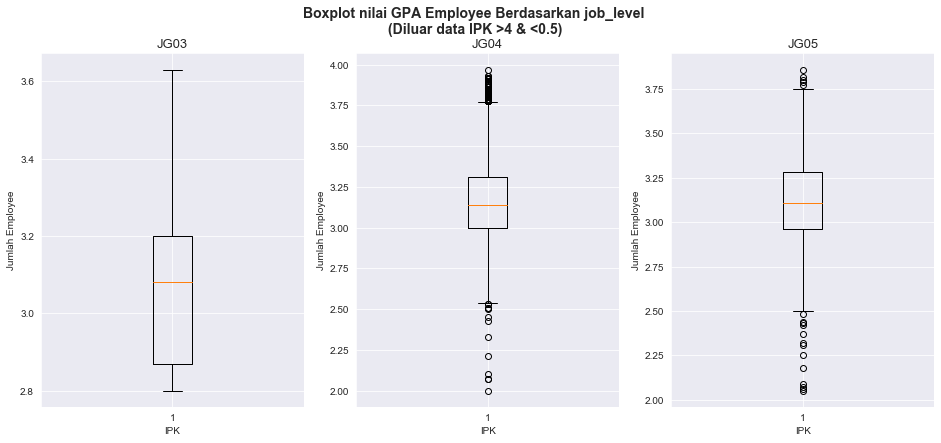

In [14]:
JG = ['JG03','JG04','JG05']

plt.figure(figsize=(16,6.5))
plt.suptitle('Boxplot nilai GPA Employee Berdasarkan job_level\n (Diluar data IPK >4 & <0.5)', fontsize=14, fontweight='bold')
for x in range(len(JG)) :
    plt.subplot(1,3,x+1)
    plt.title('JG0'+str(3+x), fontsize=13)
    plt.boxplot(normal_gpa[normal_gpa['job_level']==JG[x]]['GPA'])
    plt.xlabel('IPK')
    plt.ylabel('Jumlah Employee')

In [15]:
jg03_normal_gpa = normal_gpa[normal_gpa['job_level']=='JG03']['GPA']
jg03_normal_gpa.describe()

count    29.000000
mean      3.095172
std       0.232389
min       2.800000
25%       2.870000
50%       3.080000
75%       3.200000
max       3.630000
Name: GPA, dtype: float64

In [16]:
jg04_normal_gpa = normal_gpa[normal_gpa['job_level']=='JG04']['GPA']
jg04_normal_gpa.describe()

count    8413.000000
mean        3.164201
std         0.239812
min         2.000000
25%         3.000000
50%         3.140000
75%         3.310000
max         3.970000
Name: GPA, dtype: float64

In [17]:
jg05_normal_gpa = normal_gpa[normal_gpa['job_level']=='JG05']['GPA']
jg05_normal_gpa.describe()

count    509.000000
mean       3.110747
std        0.277930
min        2.050000
25%        2.960000
50%        3.110000
75%        3.280000
max        3.860000
Name: GPA, dtype: float64

In [18]:
wrong_gpa[wrong_gpa['job_level']=='JG03']['GPA']

2167    0.0
2572    0.0
2624    0.0
4258    0.0
5365    0.0
7426    0.0
7898    0.0
Name: GPA, dtype: float64

In [19]:
def fixing_gpa(x):
    jg = x[0]
    gpa = x[1]
    
    if gpa > 4.00 or gpa < 0.50:
        if jg == 'JG03':
            return 3.08
        elif jg == 'JG04':
            return 3.14
        elif jg == 'JG05':
            return 3.11
    else:
        return gpa

In [20]:
df_train['GPA'] = df_train[['job_level','GPA']].apply(fixing_gpa,axis=1)

In [21]:
df_train[df_train['job_level']=='JG03']['GPA']

386      3.26
401      2.99
820      3.00
845      2.80
1184     2.80
1270     2.85
1337     2.87
1589     3.34
1754     3.15
1879     2.81
1890     3.13
1978     2.95
2167     3.08
2503     3.20
2572     3.08
2624     3.08
2948     3.18
2999     3.34
3016     3.07
3557     2.80
3569     3.63
4258     3.08
5137     3.00
5290     3.53
5365     3.08
5392     2.87
6961     3.11
7426     3.08
7898     3.08
7953     3.09
8688     3.50
8711     3.08
8777     3.07
9061     3.33
10072    2.81
11074    3.20
Name: GPA, dtype: float64

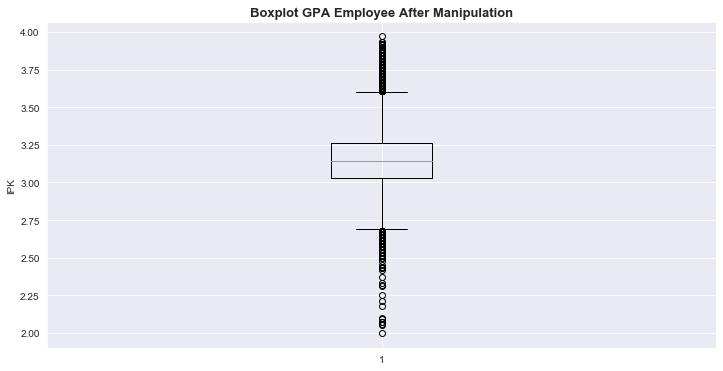

In [22]:
plt.figure(figsize=(12,6))
plt.title('Boxplot GPA Employee After Manipulation', fontsize=13, fontweight='bold')
plt.boxplot(df_train['GPA'])
plt.ylabel('IPK')
plt.show()

## Manipulate `age` column

In [23]:
df_train['age']

0        1985
1        1989
2        1970
3        1967
4        1965
         ... 
11148    1986
11149    1988
11150    1991
11151    1987
11152    1980
Name: age, Length: 11152, dtype: int64

In [24]:
df_train['age_now'] = 2021-df_train['age']

In [25]:
df_train['age_now'].describe()

count    11152.000000
mean        35.163379
std          4.632164
min         24.000000
25%         32.000000
50%         34.000000
75%         36.000000
max         58.000000
Name: age_now, dtype: float64

## Manipulate `age` column

In [26]:
df_train['year_graduated']

0        2011
1        2007
2        1989
3        1987
4        1985
         ... 
11148    2016
11149    2015
11150    2017
11151    2012
11152    2009
Name: year_graduated, Length: 11152, dtype: int64

In [27]:
df_train['year_since_graduated'] = 2021-df_train['year_graduated']

In [28]:
df_train['year_since_graduated'].describe()

count    11152.00000
mean        11.82613
std          4.11726
min          2.00000
25%          9.00000
50%         11.00000
75%         13.00000
max         39.00000
Name: year_since_graduated, dtype: float64

## Dummy Variable

In [29]:
jg = pd.get_dummies(df_train['job_level'],drop_first=True)
pg = pd.get_dummies(df_train['person_level'],drop_first=True)
emp_type = pd.get_dummies(df_train['Employee_type'],drop_first=True)
gender = pd.get_dummies(df_train['gender'],drop_first=True)
marital = pd.get_dummies(df_train['marital_status_maried(Y/N)'],drop_first=True)
edu = pd.get_dummies(df_train['Education_level'],drop_first=True)

In [30]:
dummy = pd.concat([jg,pg,emp_type,gender,marital,edu], axis=1)
dummy

,JG04,JG05,PG02,PG03,PG04,PG05,PG06,PG07,PG08,RM_type_B,RM_type_C,2,Y,level_1,level_2,level_3,level_4,level_5
0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0
1,1,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0
2,0,1,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0
3,0,1,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0
4,0,1,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11148,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1
11149,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1
11150,1,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,0,1
11151,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [31]:
df = df_train.drop(['job_level', 'person_level', 'Employee_type',
                   'gender','marital_status_maried(Y/N)', 
                   'Education_level', 'age', 'year_graduated', 'Best Performance'], axis=1)

In [32]:
df.head()

,job_duration_in_current_job_level,job_duration_in_current_person_level,job_duration_in_current_branch,number_of_dependences,GPA,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,age_now,year_since_graduated
0,1.352775,1.352775,1.732051,1,2.86,4,2,3,2,3,0,46.37,0.0,36,10
1,1.292285,1.292285,1.039230,0,3.14,4,4,3,0,0,1,47.68,0.0,32,14
2,2.565151,2.308679,1.780449,1,3.11,28,10,9,6,2,1,40.73,0.0,51,32
3,2.828427,1.000000,1.385641,2,3.11,29,11,6,0,4,10,47.42,0.0,54,34
4,2.828427,2.828427,0.707107,3,3.11,30,9,8,2,3,0,47.18,0.0,56,36


## Concatinate `df` and `dummy`

In [33]:
data = pd.concat([dummy,df,df_train['Best Performance']],axis=1)
data

,JG04,JG05,PG02,PG03,PG04,PG05,PG06,PG07,PG08,RM_type_B,...,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,age_now,year_since_graduated,Best Performance
0,1,0,0,1,0,0,0,0,0,0,...,2,3,2,3,0,46.37,0.0,36,10,0
1,1,0,0,1,0,0,0,0,0,0,...,4,3,0,0,1,47.68,0.0,32,14,0
2,0,1,0,0,0,0,1,0,0,0,...,10,9,6,2,1,40.73,0.0,51,32,0
3,0,1,0,0,0,0,1,0,0,0,...,11,6,0,4,10,47.42,0.0,54,34,1
4,0,1,0,0,0,0,1,0,0,0,...,9,8,2,3,0,47.18,0.0,56,36,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11148,1,0,0,1,0,0,0,0,0,0,...,3,3,0,4,1,50.87,0.0,35,5,0
11149,1,0,0,1,0,0,0,0,0,1,...,1,2,0,6,0,79.91,0.0,33,6,0
11150,1,0,0,1,0,0,0,0,0,1,...,1,2,0,4,0,78.38,0.0,30,4,0
11151,1,0,0,1,0,0,0,0,0,0,...,5,4,0,4,1,85.94,1.0,34,9,0


In [34]:
X = data.drop('Best Performance',axis=1)
y = data['Best Performance']

## Correlation

In [35]:
data.corr()['Best Performance'].sort_values(ascending=False)

Best Performance                         1.000000
RM_type_B                                0.023073
PG08                                     0.022831
PG06                                     0.021722
job_duration_from_training               0.019219
age_now                                  0.018957
job_duration_in_current_branch           0.017272
job_duration_in_current_person_level     0.016152
branch_rotation                          0.016067
level_1                                  0.014677
sick_leaves                              0.011410
year_since_graduated                     0.008470
job_rotation                             0.007721
job_duration_in_current_job_level        0.006956
level_3                                  0.004391
PG02                                     0.004360
PG03                                     0.003634
JG05                                     0.002771
level_5                                 -0.001275
RM_type_C                               -0.002904


## Checking imbalanced data

In [36]:
y.value_counts()

0    9515
1    1637
Name: Best Performance, dtype: int64

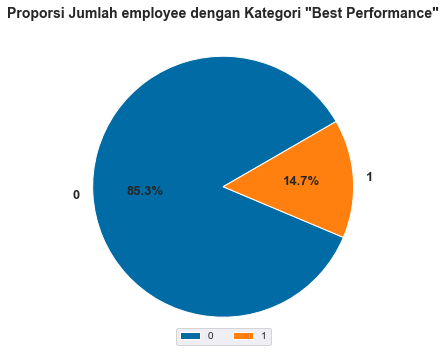

In [37]:
plt.figure(figsize=(6,6))
plt.title('Proporsi Jumlah employee dengan Kategori "Best Performance"', fontsize=14, fontweight='bold')
plt.pie(y.value_counts(), 
       autopct='%.1f%%', labels=df_train['Best Performance'].value_counts().index, 
       textprops={'fontsize':13,'fontweight':'bold'}, startangle=30)
plt.legend(loc='lower center', ncol=3)
plt.show()

## Oversampling Dataset

In [38]:
X.shape

(11152, 33)

In [39]:
y.shape

(11152,)

In [40]:
y.value_counts()

0    9515
1    1637
Name: Best Performance, dtype: int64

In [41]:
smot = SMOTE()
X_os, y_os = smot.fit_resample(X,y)

In [42]:
X_os.shape

(19030, 33)

In [43]:
y_os.value_counts()

1    9515
0    9515
Name: Best Performance, dtype: int64

## Split Dataset

In [44]:
X_train,X_test,y_train,y_test = train_test_split(X_os, y_os, test_size=0.3, random_state=42)

In [45]:
X_train.shape

(13321, 33)

In [46]:
X_train

,JG04,JG05,PG02,PG03,PG04,PG05,PG06,PG07,PG08,RM_type_B,...,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,age_now,year_since_graduated
15025,1,0,0,1,0,0,0,0,0,0,...,4,2,2,0,0,0,110.093862,3.0,33,9
11323,1,0,0,1,0,0,0,0,0,1,...,2,1,2,0,2,0,61.559633,0.0,30,6
18283,1,0,0,1,0,0,0,0,0,1,...,4,3,3,0,2,0,51.482369,0.0,32,9
13021,1,0,0,1,0,0,0,0,0,1,...,3,2,2,0,2,0,44.345102,0.0,32,7
5405,1,0,0,1,0,0,0,0,0,1,...,4,2,3,0,2,0,78.370000,0.0,35,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,1,0,0,0,1,0,0,0,0,0,...,14,7,6,0,1,0,54.782966,0.0,40,18
11964,1,0,0,1,0,0,0,0,0,1,...,2,2,2,0,2,0,80.899358,0.0,31,10
5390,1,0,0,1,0,0,0,0,0,1,...,3,1,2,0,2,7,65.440000,0.0,32,8
860,1,0,0,1,0,0,0,0,0,0,...,5,3,3,1,4,0,89.980000,2.0,35,8


In [47]:
y_train.shape

(13321,)

In [48]:
X_test.shape

(5709, 33)

In [49]:
y_train

15025    1
11323    1
18283    1
13021    1
5405     0
        ..
11284    1
11964    1
5390     0
860      0
15795    1
Name: Best Performance, Length: 13321, dtype: int64

In [50]:
y_test

2141     1
18340    1
980      0
326      0
12084    1
        ..
4904     0
2882     0
3205     1
9478     0
6935     1
Name: Best Performance, Length: 5709, dtype: int64

In [51]:
y_test.value_counts()

1    2867
0    2842
Name: Best Performance, dtype: int64

## Modelling

In [52]:
logreg = LogisticRegression(solver='newton-cg')

In [53]:
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [54]:
pred = logreg.predict(X_test)
pred

array([0, 1, 0, ..., 1, 0, 0], dtype=int64)

In [55]:
proba = logreg.predict_proba(X_test)
proba

array([[0.58393485, 0.41606515],
       [0.209772  , 0.790228  ],
       [0.68895021, 0.31104979],
       ...,
       [0.32788473, 0.67211527],
       [0.75177118, 0.24822882],
       [0.61638126, 0.38361874]])

In [56]:
print(confusion_matrix(y_test,pred))

[[2212  630]
 [1038 1829]]


<Figure size 432x432 with 0 Axes>

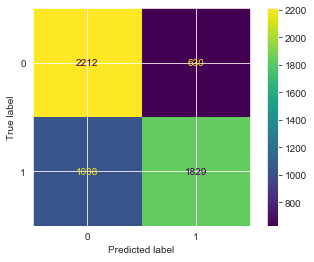

In [57]:
plt.figure(figsize=(6,6))
plot_confusion_matrix(logreg,X_test,y_test, values_format='d')
plt.show()

In [58]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.68      0.78      0.73      2842
           1       0.74      0.64      0.69      2867

    accuracy                           0.71      5709
   macro avg       0.71      0.71      0.71      5709
weighted avg       0.71      0.71      0.71      5709



In [59]:
cv_score = cross_val_score(logreg,X_test,y_test, cv=10, scoring='accuracy')

In [60]:
cv_score

array([0.67425569, 0.71628722, 0.70753065, 0.71978984, 0.6882662 ,
       0.71103327, 0.66900175, 0.72504378, 0.70577933, 0.6754386 ])

In [61]:
cv_score.mean()

0.6992426337296832

In [62]:
proba_best_1 = proba[:,1]
fpr_1, tpr_1, threshold_1 = roc_curve(y_test, proba_best_1)
roc_auc_logreg1 = auc(fpr_1,tpr_1)

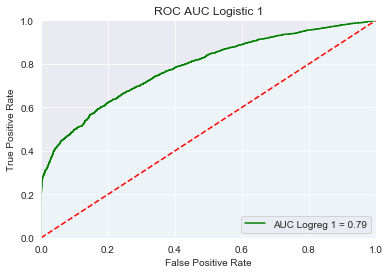

In [63]:
plt.title('ROC AUC Logistic 1')
plt.plot(fpr_1, tpr_1, 'green', label='AUC Logreg 1 = {}'.format(round(roc_auc_logreg1,2)))
plt.plot([0,1],[0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.fill_between(fpr_1,tpr_1, 0, facecolor='azure', alpha=0.5)
plt.legend(loc = 'lower right')

## import test data

In [64]:
df_test = pd.read_csv('test.csv')
df_test

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,gender,age,marital_status_maried(Y/N),number_of_dependences,...,GPA,year_graduated,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal
0,JG04,1.256981,PG03,1.256981,0.707107,RM_type_A,1,1988,N,0,...,3.08,2009,6,4,2,6,3,7,84.02,0.0
1,JG04,1.224745,PG03,1.224745,1.256981,RM_type_B,2,1991,N,0,...,3.31,2014,2,2,2,0,1,0,63.74,0.0
2,JG04,0.500000,PG03,0.500000,1.081665,RM_type_A,2,1989,Y,1,...,3.44,2011,4,2,2,0,2,1,88.19,1.0
3,JG04,1.256981,PG03,1.256981,1.802776,RM_type_A,2,1990,Y,1,...,0.00,2014,3,1,3,0,3,0,25.94,0.0
4,JG04,1.352775,PG03,1.352775,1.224745,RM_type_B,1,1985,Y,0,...,3.34,2007,5,3,2,0,3,0,82.32,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,JG04,1.292285,PG03,1.292285,0.707107,RM_type_B,2,1988,Y,0,...,3.01,2015,2,2,2,0,4,0,58.60,0.0
5996,JG04,1.352775,PG03,1.352775,1.581139,RM_type_A,2,1989,Y,1,...,3.56,2011,5,3,2,7,3,0,90.64,3.0
5997,JG04,1.385641,PG03,1.385641,1.224745,RM_type_A,2,1991,Y,0,...,3.59,2013,3,2,3,0,16,0,13.02,0.0
5998,JG05,1.385641,PG05,1.385641,0.648074,RM_type_A,2,1980,Y,2,...,2.93,2003,14,7,6,8,2,0,82.26,0.0


In [65]:
df_test.isnull().sum().sum()

0

In [66]:
df_test.duplicated().sum()

0

In [67]:
df_test['GPA'] = df_test[['job_level','GPA']].apply(fixing_gpa,axis=1)

In [68]:
df_test['age_now'] = 2021-df_test['age']

In [69]:
df_test['year_since_graduated'] = 2021-df_test['year_graduated']

In [70]:
jg = pd.get_dummies(df_test['job_level'],drop_first=True)
pg = pd.get_dummies(df_test['person_level'],drop_first=True)
emp_type = pd.get_dummies(df_test['Employee_type'],drop_first=True)
gender = pd.get_dummies(df_test['gender'],drop_first=True)
marital = pd.get_dummies(df_test['marital_status_maried(Y/N)'],drop_first=True)
edu = pd.get_dummies(df_test['Education_level'],drop_first=True)

In [71]:
dummy = pd.concat([jg,pg,emp_type,gender,marital,edu], axis=1)
dummy

,JG04,JG05,JG06,PG02,PG03,PG04,PG05,PG06,PG07,RM_type_B,RM_type_C,2,Y,level_1,level_2,level_3,level_4,level_5
0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0
2,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0
3,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0
4,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,1,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,1,0
5996,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0
5997,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0
5998,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0


In [72]:
df = df_test.drop(['job_level', 'person_level', 'Employee_type',
                   'gender','marital_status_maried(Y/N)', 
                   'Education_level', 'age', 'year_graduated'], axis=1)

In [73]:
df.head()

,job_duration_in_current_job_level,job_duration_in_current_person_level,job_duration_in_current_branch,number_of_dependences,GPA,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,age_now,year_since_graduated
0,1.256981,1.256981,0.707107,0,3.08,6,4,2,6,3,7,84.02,0.0,33,12
1,1.224745,1.224745,1.256981,0,3.31,2,2,2,0,1,0,63.74,0.0,30,7
2,0.500000,0.500000,1.081665,1,3.44,4,2,2,0,2,1,88.19,1.0,32,10
3,1.256981,1.256981,1.802776,1,3.14,3,1,3,0,3,0,25.94,0.0,31,7
4,1.352775,1.352775,1.224745,0,3.34,5,3,2,0,3,0,82.32,0.0,36,14


In [74]:
data_test = pd.concat([dummy,df],axis=1)

In [75]:
data_test

,JG04,JG05,JG06,PG02,PG03,PG04,PG05,PG06,PG07,RM_type_B,...,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,age_now,year_since_graduated
0,1,0,0,0,1,0,0,0,0,0,...,6,4,2,6,3,7,84.02,0.0,33,12
1,1,0,0,0,1,0,0,0,0,1,...,2,2,2,0,1,0,63.74,0.0,30,7
2,1,0,0,0,1,0,0,0,0,0,...,4,2,2,0,2,1,88.19,1.0,32,10
3,1,0,0,0,1,0,0,0,0,0,...,3,1,3,0,3,0,25.94,0.0,31,7
4,1,0,0,0,1,0,0,0,0,1,...,5,3,2,0,3,0,82.32,0.0,36,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,1,0,0,0,1,0,0,0,0,1,...,2,2,2,0,4,0,58.60,0.0,33,6
5996,1,0,0,0,1,0,0,0,0,0,...,5,3,2,7,3,0,90.64,3.0,32,10
5997,1,0,0,0,1,0,0,0,0,0,...,3,2,3,0,16,0,13.02,0.0,30,8
5998,0,1,0,0,0,0,1,0,0,0,...,14,7,6,8,2,0,82.26,0.0,41,18


In [76]:
print(list(data_test.columns))

['JG04', 'JG05', 'JG06', 'PG02', 'PG03', 'PG04', 'PG05', 'PG06', 'PG07', 'RM_type_B', 'RM_type_C', 2, 'Y', 'level_1', 'level_2', 'level_3', 'level_4', 'level_5', 'job_duration_in_current_job_level', 'job_duration_in_current_person_level', 'job_duration_in_current_branch', 'number_of_dependences', 'GPA', 'job_duration_from_training', 'branch_rotation', 'job_rotation', 'assign_of_otherposition', 'annual leave', 'sick_leaves', 'Last_achievement_%', 'Achievement_above_100%_during3quartal', 'age_now', 'year_since_graduated']


In [77]:
print(list(X_train.columns))

['JG04', 'JG05', 'PG02', 'PG03', 'PG04', 'PG05', 'PG06', 'PG07', 'PG08', 'RM_type_B', 'RM_type_C', 2, 'Y', 'level_1', 'level_2', 'level_3', 'level_4', 'level_5', 'job_duration_in_current_job_level', 'job_duration_in_current_person_level', 'job_duration_in_current_branch', 'number_of_dependences', 'GPA', 'job_duration_from_training', 'branch_rotation', 'job_rotation', 'assign_of_otherposition', 'annual leave', 'sick_leaves', 'Last_achievement_%', 'Achievement_above_100%_during3quartal', 'age_now', 'year_since_graduated']


In [78]:
pred_res = logreg.predict(data_test)
pred_res

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [79]:
proba_res = logreg.predict_proba(data_test)
proba_res

array([[0.43458863, 0.56541137],
       [0.48172088, 0.51827912],
       [0.41334261, 0.58665739],
       ...,
       [0.62282434, 0.37717566],
       [0.7222112 , 0.2777888 ],
       [0.69208318, 0.30791682]])

## File Submission - logreg(solver=newton-cg)

In [80]:
result = proba_res[:,1]
df_result = pd.DataFrame(result, columns=['Best Performance'])
df_result.reset_index(inplace=True)

In [81]:
df_result

,index,Best Performance
0,0,0.565411
1,1,0.518279
2,2,0.586657
3,3,0.575475
4,4,0.652415
...,...,...
5995,5995,0.471771
5996,5996,0.467111
5997,5997,0.377176
5998,5998,0.277789


In [82]:
# df_result.to_csv('Submission-Logreg(solver=newton-cg).csv', index=False)

## Statsmodels

In [83]:
# sm_log = sm.Logit(y, sm.add_constant(X))
# result = sm_log.fit()
# print(result.summary())

## Try Label Encoder

In [84]:
df_train2 = df_train.copy()
df_train2

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,gender,age,marital_status_maried(Y/N),number_of_dependences,...,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,Best Performance,age_now,year_since_graduated
0,JG04,1.352775,PG03,1.352775,1.732051,RM_type_A,2,1985,Y,1,...,2,3,2,3,0,46.37,0.0,0,36,10
1,JG04,1.292285,PG03,1.292285,1.039230,RM_type_A,2,1989,Y,0,...,4,3,0,0,1,47.68,0.0,0,32,14
2,JG05,2.565151,PG06,2.308679,1.780449,RM_type_C,1,1970,Y,1,...,10,9,6,2,1,40.73,0.0,0,51,32
3,JG05,2.828427,PG06,1.000000,1.385641,RM_type_A,2,1967,Y,2,...,11,6,0,4,10,47.42,0.0,1,54,34
4,JG05,2.828427,PG06,2.828427,0.707107,RM_type_A,2,1965,Y,3,...,9,8,2,3,0,47.18,0.0,0,56,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11148,JG04,1.256981,PG03,1.256981,1.224745,RM_type_A,2,1986,Y,1,...,3,3,0,4,1,50.87,0.0,0,35,5
11149,JG04,1.385641,PG03,1.385641,1.802776,RM_type_B,1,1988,Y,2,...,1,2,0,6,0,79.91,0.0,0,33,6
11150,JG04,1.256981,PG03,1.256981,1.385641,RM_type_B,2,1991,Y,0,...,1,2,0,4,0,78.38,0.0,0,30,4
11151,JG04,1.118034,PG03,1.118034,0.000000,RM_type_A,1,1987,Y,1,...,5,4,0,4,1,85.94,1.0,0,34,9


### Label Encoder

`job_level`

In [85]:
df_train2['job_level'].head()

0    JG04
1    JG04
2    JG05
3    JG05
4    JG05
Name: job_level, dtype: object

In [86]:
df_train2['job_level'] = df_train2['job_level'].map({'JG03':1,'JG04':2,'JG05':3})

In [87]:
df_train2['job_level']

0        2
1        2
2        3
3        3
4        3
        ..
11148    2
11149    2
11150    2
11151    2
11152    2
Name: job_level, Length: 11152, dtype: int64

`person_level`

In [88]:
df_train2['person_level'].unique()

array(['PG03', 'PG06', 'PG05', 'PG04', 'PG07', 'PG02', 'PG01', 'PG08'],
      dtype=object)

In [89]:
df_train2['person_level'] = df_train2['person_level'].map({'PG01':1,'PG02':2,'PG03':3, 'PG04':4, 
                                                          'PG05':5,'PG06':6,'PG07':7, 'PG08':8})

In [90]:
df_train2['person_level'].unique()

array([3, 6, 5, 4, 7, 2, 1, 8], dtype=int64)

`Education_level`

In [91]:
df_train2['Education_level'].unique()

array(['level_0', 'level_1', 'level_2', 'level_3', 'level_4', 'level_5'],
      dtype=object)

In [92]:
df_train2['Education_level'] = df_train2['Education_level'].map({'level_0':1,'level_1':2,'level_2':3, 
                                                              'level_3':4, 'level_4':5, 'level_5':6})

In [93]:
df_train2['Education_level'].unique()

array([1, 2, 3, 4, 5, 6], dtype=int64)

### Dummy Variable

In [94]:
emp_type = pd.get_dummies(df_train2['Employee_type'],drop_first=True)
gender = pd.get_dummies(df_train2['gender'],drop_first=True)
marital = pd.get_dummies(df_train2['marital_status_maried(Y/N)'],drop_first=True)

In [95]:
dummy2 = pd.concat([emp_type,gender,marital], axis=1)
dummy2

,RM_type_B,RM_type_C,2,Y
0,0,0,1,1
1,0,0,1,1
2,0,1,0,1
3,0,0,1,1
4,0,0,1,1
...,...,...,...,...
11148,0,0,1,1
11149,1,0,0,1
11150,1,0,1,1
11151,0,0,0,1


In [96]:
df = df_train2.drop(['Employee_type', 'gender','marital_status_maried(Y/N)', 
                    'age', 'year_graduated', 'Best Performance'], axis=1)

In [97]:
df.head()

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,number_of_dependences,Education_level,GPA,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,age_now,year_since_graduated
0,2,1.352775,3,1.352775,1.732051,1,1,2.86,4,2,3,2,3,0,46.37,0.0,36,10
1,2,1.292285,3,1.292285,1.039230,0,2,3.14,4,4,3,0,0,1,47.68,0.0,32,14
2,3,2.565151,6,2.308679,1.780449,1,2,3.11,28,10,9,6,2,1,40.73,0.0,51,32
3,3,2.828427,6,1.000000,1.385641,2,2,3.11,29,11,6,0,4,10,47.42,0.0,54,34
4,3,2.828427,6,2.828427,0.707107,3,2,3.11,30,9,8,2,3,0,47.18,0.0,56,36


In [98]:
df.shape

(11152, 18)

## Concatinate `df` and `dummy`

In [99]:
data2 = pd.concat([dummy2,df,df_train2['Best Performance']],axis=1)
data2

,RM_type_B,RM_type_C,2,Y,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,number_of_dependences,...,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,age_now,year_since_graduated,Best Performance
0,0,0,1,1,2,1.352775,3,1.352775,1.732051,1,...,2,3,2,3,0,46.37,0.0,36,10,0
1,0,0,1,1,2,1.292285,3,1.292285,1.039230,0,...,4,3,0,0,1,47.68,0.0,32,14,0
2,0,1,0,1,3,2.565151,6,2.308679,1.780449,1,...,10,9,6,2,1,40.73,0.0,51,32,0
3,0,0,1,1,3,2.828427,6,1.000000,1.385641,2,...,11,6,0,4,10,47.42,0.0,54,34,1
4,0,0,1,1,3,2.828427,6,2.828427,0.707107,3,...,9,8,2,3,0,47.18,0.0,56,36,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11148,0,0,1,1,2,1.256981,3,1.256981,1.224745,1,...,3,3,0,4,1,50.87,0.0,35,5,0
11149,1,0,0,1,2,1.385641,3,1.385641,1.802776,2,...,1,2,0,6,0,79.91,0.0,33,6,0
11150,1,0,1,1,2,1.256981,3,1.256981,1.385641,0,...,1,2,0,4,0,78.38,0.0,30,4,0
11151,0,0,0,1,2,1.118034,3,1.118034,0.000000,1,...,5,4,0,4,1,85.94,1.0,34,9,0


In [100]:
X2 = data2.drop('Best Performance',axis=1)
y2 = data2['Best Performance']

## Correlation

In [101]:
data2.corr()['Best Performance'].sort_values(ascending=False)

Best Performance                         1.000000
RM_type_B                                0.023073
job_duration_from_training               0.019219
age_now                                  0.018957
job_duration_in_current_branch           0.017272
job_duration_in_current_person_level     0.016152
branch_rotation                          0.016067
sick_leaves                              0.011410
year_since_graduated                     0.008470
job_rotation                             0.007721
job_duration_in_current_job_level        0.006956
person_level                             0.002231
job_level                               -0.000056
RM_type_C                               -0.002904
GPA                                     -0.004370
Achievement_above_100%_during3quartal   -0.004723
assign_of_otherposition                 -0.007285
number_of_dependences                   -0.010010
annual leave                            -0.010289
Education_level                         -0.012527


## Checking imbalanced data

In [102]:
y2.value_counts()

0    9515
1    1637
Name: Best Performance, dtype: int64

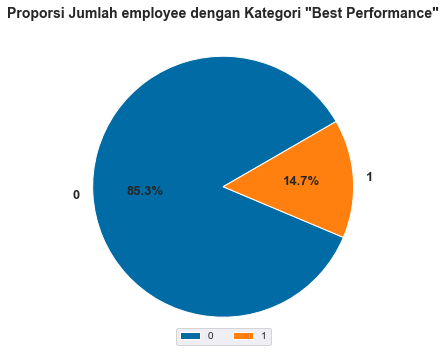

In [103]:
plt.figure(figsize=(6,6))
plt.title('Proporsi Jumlah employee dengan Kategori "Best Performance"', fontsize=14, fontweight='bold')
plt.pie(y2.value_counts(), 
       autopct='%.1f%%', labels=df_train['Best Performance'].value_counts().index, 
       textprops={'fontsize':13,'fontweight':'bold'}, startangle=30)
plt.legend(loc='lower center', ncol=3)
plt.show()

## Oversampling Dataset

In [104]:
X2.shape

(11152, 22)

In [105]:
y2.shape

(11152,)

In [106]:
y2.value_counts()

0    9515
1    1637
Name: Best Performance, dtype: int64

In [107]:
smot = SMOTE()
X_os2, y_os2 = smot.fit_resample(X2,y2)

In [108]:
X_os2.shape

(19030, 22)

In [109]:
y_os2.value_counts()

1    9515
0    9515
Name: Best Performance, dtype: int64

## Split Dataset

In [110]:
X_train,X_test,y_train,y_test = train_test_split(X_os2, y_os2, test_size=0.3, random_state=42)

In [111]:
X_train.shape

(13321, 22)

In [112]:
X_train

,RM_type_B,RM_type_C,2,Y,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,number_of_dependences,...,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,age_now,year_since_graduated
15025,0,0,1,1,2,1.385641,3,1.385641,1.773861,0,...,3,2,2,0,2,0,79.130505,0.000000,33,8
11323,0,0,1,1,2,1.892800,5,1.005477,0.689653,2,...,14,9,7,4,3,0,92.029406,1.341373,40,15
18283,1,0,1,0,2,1.268894,3,1.268894,0.753689,0,...,4,3,3,0,2,0,57.007208,0.000000,33,10
13021,0,0,0,1,2,1.545848,3,1.545848,1.250063,1,...,6,3,3,0,4,4,91.387639,2.258000,34,12
5405,1,0,1,1,2,1.352775,3,1.352775,1.555635,1,...,4,2,3,0,2,0,78.370000,0.000000,35,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,0,0,1,1,2,1.284353,3,1.284353,0.632273,0,...,3,3,2,0,4,0,78.219971,0.000000,31,9
11964,0,0,1,1,2,2.685828,4,1.883612,1.224745,1,...,13,10,8,0,5,0,108.221533,3.000000,40,17
5390,1,0,1,1,2,1.352775,3,1.352775,1.634013,1,...,3,1,2,0,2,7,65.440000,0.000000,32,8
860,0,0,0,1,2,1.191638,3,1.191638,0.648074,0,...,5,3,3,1,4,0,89.980000,2.000000,35,8


In [113]:
y_train.shape

(13321,)

In [114]:
X_test.shape

(5709, 22)

In [115]:
y_train

15025    1
11323    1
18283    1
13021    1
5405     0
        ..
11284    1
11964    1
5390     0
860      0
15795    1
Name: Best Performance, Length: 13321, dtype: int64

In [116]:
y_test

2141     1
18340    1
980      0
326      0
12084    1
        ..
4904     0
2882     0
3205     1
9478     0
6935     1
Name: Best Performance, Length: 5709, dtype: int64

In [117]:
y_test.value_counts()

1    2867
0    2842
Name: Best Performance, dtype: int64

## Modelling

In [118]:
logreg2 = LogisticRegression(solver='newton-cg')

In [119]:
logreg2.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [120]:
pred2 = logreg2.predict(X_test)
pred2

array([0, 1, 1, ..., 1, 0, 0], dtype=int64)

In [121]:
proba2 = logreg2.predict_proba(X_test)
proba2

array([[0.61278829, 0.38721171],
       [0.32368019, 0.67631981],
       [0.36504568, 0.63495432],
       ...,
       [0.3138507 , 0.6861493 ],
       [0.77392464, 0.22607536],
       [0.64953891, 0.35046109]])

In [122]:
print(confusion_matrix(y_test,pred2))

[[1903  939]
 [1012 1855]]


<Figure size 432x432 with 0 Axes>

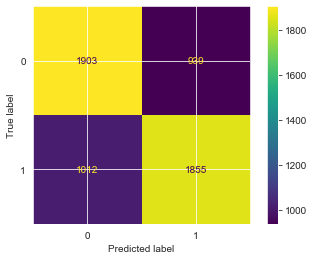

In [123]:
plt.figure(figsize=(6,6))
plot_confusion_matrix(logreg2,X_test,y_test, values_format='d')
plt.show()

In [124]:
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

           0       0.65      0.67      0.66      2842
           1       0.66      0.65      0.66      2867

    accuracy                           0.66      5709
   macro avg       0.66      0.66      0.66      5709
weighted avg       0.66      0.66      0.66      5709



In [125]:
cv_score = cross_val_score(logreg2,X_test,y_test, cv=10, scoring='accuracy')

In [126]:
cv_score

array([0.63922942, 0.65849387, 0.68476357, 0.66900175, 0.61821366,
       0.64448336, 0.6497373 , 0.71278459, 0.65674256, 0.60877193])

In [127]:
cv_score.mean()

0.6542222017390236

In [128]:
proba_best_2 = proba2[:,1]
fpr_2, tpr_2, threshold_2 = roc_curve(y_test, proba_best_2)
roc_auc_logreg2 = auc(fpr_2,tpr_2)

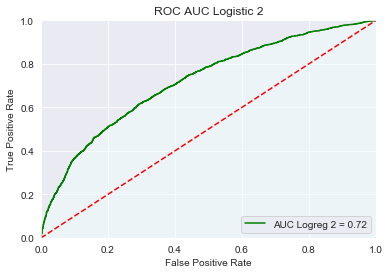

In [129]:
plt.title('ROC AUC Logistic 2')
plt.plot(fpr_2, tpr_2, 'green', label='AUC Logreg 2 = {}'.format(round(roc_auc_logreg2,2)))
plt.plot([0,1],[0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.fill_between(fpr_2,tpr_2, 0, facecolor='azure', alpha=0.5)
plt.legend(loc = 'lower right')

### DATA TEST

In [130]:
df_test

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,gender,age,marital_status_maried(Y/N),number_of_dependences,...,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,age_now,year_since_graduated
0,JG04,1.256981,PG03,1.256981,0.707107,RM_type_A,1,1988,N,0,...,6,4,2,6,3,7,84.02,0.0,33,12
1,JG04,1.224745,PG03,1.224745,1.256981,RM_type_B,2,1991,N,0,...,2,2,2,0,1,0,63.74,0.0,30,7
2,JG04,0.500000,PG03,0.500000,1.081665,RM_type_A,2,1989,Y,1,...,4,2,2,0,2,1,88.19,1.0,32,10
3,JG04,1.256981,PG03,1.256981,1.802776,RM_type_A,2,1990,Y,1,...,3,1,3,0,3,0,25.94,0.0,31,7
4,JG04,1.352775,PG03,1.352775,1.224745,RM_type_B,1,1985,Y,0,...,5,3,2,0,3,0,82.32,0.0,36,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,JG04,1.292285,PG03,1.292285,0.707107,RM_type_B,2,1988,Y,0,...,2,2,2,0,4,0,58.60,0.0,33,6
5996,JG04,1.352775,PG03,1.352775,1.581139,RM_type_A,2,1989,Y,1,...,5,3,2,7,3,0,90.64,3.0,32,10
5997,JG04,1.385641,PG03,1.385641,1.224745,RM_type_A,2,1991,Y,0,...,3,2,3,0,16,0,13.02,0.0,30,8
5998,JG05,1.385641,PG05,1.385641,0.648074,RM_type_A,2,1980,Y,2,...,14,7,6,8,2,0,82.26,0.0,41,18


In [131]:
df_test['job_level'].unique()

array(['JG04', 'JG05', 'JG03', 'JG06'], dtype=object)

In [132]:
# df_test['GPA'] = df_test[['job_level','GPA']].apply(fixing_gpa,axis=1)

# df_test['age_now'] = 2021-df_test['age']

# df_test['year_since_graduated'] = 2021-df_test['year_graduated']

In [133]:
df_test['Education_level'].unique()

array(['level_3', 'level_4', 'level_1', 'level_5', 'level_0', 'level_2'],
      dtype=object)

In [134]:
#label encoder
df_test['job_level'] = df_test['job_level'].map({'JG03':1,'JG04':2,'JG05':3,'JG06':4})

df_test['person_level'] = df_test['person_level'].map({'PG01':1,'PG02':2,'PG03':3, 'PG04':4, 
                                                          'PG05':5,'PG06':6,'PG07':7, 'PG08':8})

df_test['Education_level'] = df_test['Education_level'].map({'level_0':1,'level_1':2,'level_2':3, 
                                                              'level_3':4, 'level_4':5, 'level_5':6})

In [135]:
df_test.head()

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,gender,age,marital_status_maried(Y/N),number_of_dependences,...,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,age_now,year_since_graduated
0,2,1.256981,3,1.256981,0.707107,RM_type_A,1,1988,N,0,...,6,4,2,6,3,7,84.02,0.0,33,12
1,2,1.224745,3,1.224745,1.256981,RM_type_B,2,1991,N,0,...,2,2,2,0,1,0,63.74,0.0,30,7
2,2,0.500000,3,0.500000,1.081665,RM_type_A,2,1989,Y,1,...,4,2,2,0,2,1,88.19,1.0,32,10
3,2,1.256981,3,1.256981,1.802776,RM_type_A,2,1990,Y,1,...,3,1,3,0,3,0,25.94,0.0,31,7
4,2,1.352775,3,1.352775,1.224745,RM_type_B,1,1985,Y,0,...,5,3,2,0,3,0,82.32,0.0,36,14


In [136]:
df_test['job_level'].unique()

array([2, 3, 1, 4], dtype=int64)

In [137]:
#Dummy
emp_type = pd.get_dummies(df_test['Employee_type'],drop_first=True)
gender = pd.get_dummies(df_test['gender'],drop_first=True)
marital = pd.get_dummies(df_test['marital_status_maried(Y/N)'],drop_first=True)

In [138]:
dummy_test = pd.concat([emp_type,gender,marital], axis=1)
dummy_test

,RM_type_B,RM_type_C,2,Y
0,0,0,0,0
1,1,0,1,0
2,0,0,1,1
3,0,0,1,1
4,1,0,0,1
...,...,...,...,...
5995,1,0,1,1
5996,0,0,1,1
5997,0,0,1,1
5998,0,0,1,1


In [139]:
df = df_test.drop(['Employee_type', 'gender','marital_status_maried(Y/N)', 
                    'age', 'year_graduated'], axis=1)

In [140]:
df.head()

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,number_of_dependences,Education_level,GPA,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,age_now,year_since_graduated
0,2,1.256981,3,1.256981,0.707107,0,4,3.08,6,4,2,6,3,7,84.02,0.0,33,12
1,2,1.224745,3,1.224745,1.256981,0,5,3.31,2,2,2,0,1,0,63.74,0.0,30,7
2,2,0.500000,3,0.500000,1.081665,1,5,3.44,4,2,2,0,2,1,88.19,1.0,32,10
3,2,1.256981,3,1.256981,1.802776,1,5,3.14,3,1,3,0,3,0,25.94,0.0,31,7
4,2,1.352775,3,1.352775,1.224745,0,5,3.34,5,3,2,0,3,0,82.32,0.0,36,14


In [141]:
df.shape

(6000, 18)

## Concatinate `df` and `dummy`

In [142]:
data_test2 = pd.concat([dummy_test,df],axis=1)
data_test2

,RM_type_B,RM_type_C,2,Y,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,number_of_dependences,...,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,age_now,year_since_graduated
0,0,0,0,0,2,1.256981,3,1.256981,0.707107,0,...,6,4,2,6,3,7,84.02,0.0,33,12
1,1,0,1,0,2,1.224745,3,1.224745,1.256981,0,...,2,2,2,0,1,0,63.74,0.0,30,7
2,0,0,1,1,2,0.500000,3,0.500000,1.081665,1,...,4,2,2,0,2,1,88.19,1.0,32,10
3,0,0,1,1,2,1.256981,3,1.256981,1.802776,1,...,3,1,3,0,3,0,25.94,0.0,31,7
4,1,0,0,1,2,1.352775,3,1.352775,1.224745,0,...,5,3,2,0,3,0,82.32,0.0,36,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,1,0,1,1,2,1.292285,3,1.292285,0.707107,0,...,2,2,2,0,4,0,58.60,0.0,33,6
5996,0,0,1,1,2,1.352775,3,1.352775,1.581139,1,...,5,3,2,7,3,0,90.64,3.0,32,10
5997,0,0,1,1,2,1.385641,3,1.385641,1.224745,0,...,3,2,3,0,16,0,13.02,0.0,30,8
5998,0,0,1,1,3,1.385641,5,1.385641,0.648074,2,...,14,7,6,8,2,0,82.26,0.0,41,18


In [143]:
data_test2.isnull().sum()

RM_type_B                                0
RM_type_C                                0
2                                        0
Y                                        0
job_level                                0
job_duration_in_current_job_level        0
person_level                             0
job_duration_in_current_person_level     0
job_duration_in_current_branch           0
number_of_dependences                    0
Education_level                          0
GPA                                      0
job_duration_from_training               0
branch_rotation                          0
job_rotation                             0
assign_of_otherposition                  0
annual leave                             0
sick_leaves                              0
Last_achievement_%                       0
Achievement_above_100%_during3quartal    0
age_now                                  0
year_since_graduated                     0
dtype: int64

In [144]:
print(list(X_train.columns))

['RM_type_B', 'RM_type_C', 2, 'Y', 'job_level', 'job_duration_in_current_job_level', 'person_level', 'job_duration_in_current_person_level', 'job_duration_in_current_branch', 'number_of_dependences', 'Education_level', 'GPA', 'job_duration_from_training', 'branch_rotation', 'job_rotation', 'assign_of_otherposition', 'annual leave', 'sick_leaves', 'Last_achievement_%', 'Achievement_above_100%_during3quartal', 'age_now', 'year_since_graduated']


In [145]:
print(list(data_test2.columns))

['RM_type_B', 'RM_type_C', 2, 'Y', 'job_level', 'job_duration_in_current_job_level', 'person_level', 'job_duration_in_current_person_level', 'job_duration_in_current_branch', 'number_of_dependences', 'Education_level', 'GPA', 'job_duration_from_training', 'branch_rotation', 'job_rotation', 'assign_of_otherposition', 'annual leave', 'sick_leaves', 'Last_achievement_%', 'Achievement_above_100%_during3quartal', 'age_now', 'year_since_graduated']


In [146]:
pred_res2 = logreg2.predict(data_test2)
pred_res2

array([1, 0, 1, ..., 0, 0, 1], dtype=int64)

In [147]:
proba_res2 = logreg2.predict_proba(data_test2)
proba_res2

array([[0.19181426, 0.80818574],
       [0.58859873, 0.41140127],
       [0.46248932, 0.53751068],
       ...,
       [0.70406615, 0.29593385],
       [0.83532688, 0.16467312],
       [0.47777082, 0.52222918]])

## File Submission - logreg(solver=newton-cg)

In [148]:
result2 = proba_res2[:,1]
df_result2 = pd.DataFrame(result2, columns=['Best Performance'])
df_result2.reset_index(inplace=True)

In [149]:
df_result2

,index,Best Performance
0,0,0.808186
1,1,0.411401
2,2,0.537511
3,3,0.487372
4,4,0.566901
...,...,...
5995,5995,0.401961
5996,5996,0.400204
5997,5997,0.295934
5998,5998,0.164673


In [150]:
# df_result2.to_csv('Submission-LabelEncoder.csv', index=False)

# MODEL 3

In [151]:
df_train

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,gender,age,marital_status_maried(Y/N),number_of_dependences,...,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,Best Performance,age_now,year_since_graduated
0,JG04,1.352775,PG03,1.352775,1.732051,RM_type_A,2,1985,Y,1,...,2,3,2,3,0,46.37,0.0,0,36,10
1,JG04,1.292285,PG03,1.292285,1.039230,RM_type_A,2,1989,Y,0,...,4,3,0,0,1,47.68,0.0,0,32,14
2,JG05,2.565151,PG06,2.308679,1.780449,RM_type_C,1,1970,Y,1,...,10,9,6,2,1,40.73,0.0,0,51,32
3,JG05,2.828427,PG06,1.000000,1.385641,RM_type_A,2,1967,Y,2,...,11,6,0,4,10,47.42,0.0,1,54,34
4,JG05,2.828427,PG06,2.828427,0.707107,RM_type_A,2,1965,Y,3,...,9,8,2,3,0,47.18,0.0,0,56,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11148,JG04,1.256981,PG03,1.256981,1.224745,RM_type_A,2,1986,Y,1,...,3,3,0,4,1,50.87,0.0,0,35,5
11149,JG04,1.385641,PG03,1.385641,1.802776,RM_type_B,1,1988,Y,2,...,1,2,0,6,0,79.91,0.0,0,33,6
11150,JG04,1.256981,PG03,1.256981,1.385641,RM_type_B,2,1991,Y,0,...,1,2,0,4,0,78.38,0.0,0,30,4
11151,JG04,1.118034,PG03,1.118034,0.000000,RM_type_A,1,1987,Y,1,...,5,4,0,4,1,85.94,1.0,0,34,9


In [152]:
df_train3 = df_train.copy()
df_train3

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,gender,age,marital_status_maried(Y/N),number_of_dependences,...,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,Best Performance,age_now,year_since_graduated
0,JG04,1.352775,PG03,1.352775,1.732051,RM_type_A,2,1985,Y,1,...,2,3,2,3,0,46.37,0.0,0,36,10
1,JG04,1.292285,PG03,1.292285,1.039230,RM_type_A,2,1989,Y,0,...,4,3,0,0,1,47.68,0.0,0,32,14
2,JG05,2.565151,PG06,2.308679,1.780449,RM_type_C,1,1970,Y,1,...,10,9,6,2,1,40.73,0.0,0,51,32
3,JG05,2.828427,PG06,1.000000,1.385641,RM_type_A,2,1967,Y,2,...,11,6,0,4,10,47.42,0.0,1,54,34
4,JG05,2.828427,PG06,2.828427,0.707107,RM_type_A,2,1965,Y,3,...,9,8,2,3,0,47.18,0.0,0,56,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11148,JG04,1.256981,PG03,1.256981,1.224745,RM_type_A,2,1986,Y,1,...,3,3,0,4,1,50.87,0.0,0,35,5
11149,JG04,1.385641,PG03,1.385641,1.802776,RM_type_B,1,1988,Y,2,...,1,2,0,6,0,79.91,0.0,0,33,6
11150,JG04,1.256981,PG03,1.256981,1.385641,RM_type_B,2,1991,Y,0,...,1,2,0,4,0,78.38,0.0,0,30,4
11151,JG04,1.118034,PG03,1.118034,0.000000,RM_type_A,1,1987,Y,1,...,5,4,0,4,1,85.94,1.0,0,34,9


In [153]:
df_train3['Best Performance'].value_counts()

0    9515
1    1637
Name: Best Performance, dtype: int64

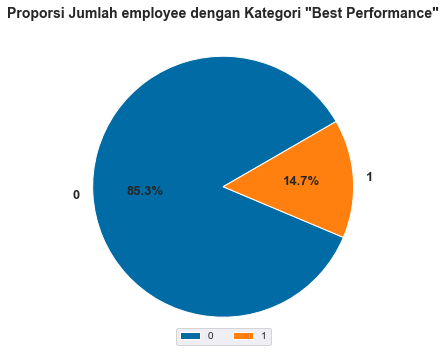

In [154]:
plt.figure(figsize=(6,6))
plt.title('Proporsi Jumlah employee dengan Kategori "Best Performance"', fontsize=14, fontweight='bold')
plt.pie(df_train3['Best Performance'].value_counts(), 
       autopct='%.1f%%', labels=df_train3['Best Performance'].value_counts().index, 
       textprops={'fontsize':13,'fontweight':'bold'}, startangle=30)
plt.legend(loc='lower center', ncol=3)
plt.show()

In [155]:
best_employee = df_train3[(df_train3['Last_achievement_%']>100.00) & (df_train3['Achievement_above_100%_during3quartal']==3)]
best_employee

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,gender,age,marital_status_maried(Y/N),number_of_dependences,...,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,Best Performance,age_now,year_since_graduated
46,JG04,1.385641,PG03,1.385641,1.224745,RM_type_A,2,1988,Y,2,...,3,3,2,3,1,121.61,3.0,0,33,15
48,JG04,1.606238,PG03,1.606238,1.039230,RM_type_A,2,1976,Y,2,...,3,2,5,10,0,105.86,3.0,0,45,26
51,JG05,2.828427,PG06,2.828427,1.824829,RM_type_A,1,1969,Y,2,...,7,8,0,8,3,109.30,3.0,0,52,33
52,JG05,2.828427,PG06,2.345208,1.224745,RM_type_A,2,1974,Y,1,...,7,6,0,0,0,101.21,3.0,1,47,28
61,JG05,2.828427,PG06,2.236068,0.707107,RM_type_A,2,1975,Y,2,...,12,6,3,3,2,101.44,3.0,0,46,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11118,JG05,1.081665,PG05,1.081665,1.224745,RM_type_A,1,1972,Y,2,...,11,8,1,0,2,110.57,3.0,0,49,12
11130,JG04,1.385641,PG03,1.385641,2.179449,RM_type_C,2,1989,N,0,...,2,3,3,6,0,106.18,3.0,0,32,4
11132,JG04,1.658312,PG03,1.658312,0.707107,RM_type_A,2,1988,N,0,...,2,4,0,4,0,106.85,3.0,0,33,7
11133,JG04,1.385641,PG03,1.385641,1.118034,RM_type_A,2,1982,Y,2,...,4,4,3,3,7,104.69,3.0,1,39,11


In [156]:
best_employee['Best Performance'].value_counts()

0    901
1    140
Name: Best Performance, dtype: int64

In [157]:
best_employee['Best Performance'] = best_employee['Best Performance'].map({0:1,1:1})

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [158]:
best_employee['Best Performance'].unique()

array([1], dtype=int64)

In [159]:
best_employee['Best Performance'].value_counts()

1    1041
Name: Best Performance, dtype: int64

In [160]:
best_employee.index

Int64Index([   46,    48,    51,    52,    61,    65,    67,    92,    96,
              117,
            ...
            10993, 11005, 11009, 11011, 11041, 11118, 11130, 11132, 11133,
            11145],
           dtype='int64', length=1041)

In [161]:
df_train3.loc[best_employee.index,'Best Performance'] = best_employee['Best Performance']

In [162]:
df_train3['Best Performance'].value_counts()

0    8614
1    2538
Name: Best Performance, dtype: int64

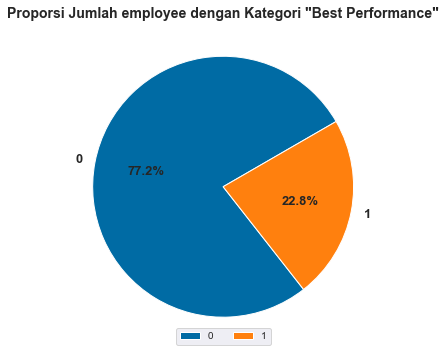

In [163]:
plt.figure(figsize=(6,6))
plt.title('Proporsi Jumlah employee dengan Kategori "Best Performance"', fontsize=14, fontweight='bold')
plt.pie(df_train3['Best Performance'].value_counts(), 
       autopct='%.1f%%', labels=df_train3['Best Performance'].value_counts().index, 
       textprops={'fontsize':13,'fontweight':'bold'}, startangle=30)
plt.legend(loc='lower center', ncol=3)
plt.show()

In [164]:
# def fixing_best_performer(x):
#     last_achv = x[0]
#     achv_3_year = x[1]
#     prfm = x[2]
    
#     if prfm == 0:
#         if last_achv > 100.00:
#             if achv_3_year == 3:
#                 return 1
#         else :
#             return prfm
#     else:
#         return prfm

In [165]:
df_train3

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,gender,age,marital_status_maried(Y/N),number_of_dependences,...,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,Best Performance,age_now,year_since_graduated
0,JG04,1.352775,PG03,1.352775,1.732051,RM_type_A,2,1985,Y,1,...,2,3,2,3,0,46.37,0.0,0,36,10
1,JG04,1.292285,PG03,1.292285,1.039230,RM_type_A,2,1989,Y,0,...,4,3,0,0,1,47.68,0.0,0,32,14
2,JG05,2.565151,PG06,2.308679,1.780449,RM_type_C,1,1970,Y,1,...,10,9,6,2,1,40.73,0.0,0,51,32
3,JG05,2.828427,PG06,1.000000,1.385641,RM_type_A,2,1967,Y,2,...,11,6,0,4,10,47.42,0.0,1,54,34
4,JG05,2.828427,PG06,2.828427,0.707107,RM_type_A,2,1965,Y,3,...,9,8,2,3,0,47.18,0.0,0,56,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11148,JG04,1.256981,PG03,1.256981,1.224745,RM_type_A,2,1986,Y,1,...,3,3,0,4,1,50.87,0.0,0,35,5
11149,JG04,1.385641,PG03,1.385641,1.802776,RM_type_B,1,1988,Y,2,...,1,2,0,6,0,79.91,0.0,0,33,6
11150,JG04,1.256981,PG03,1.256981,1.385641,RM_type_B,2,1991,Y,0,...,1,2,0,4,0,78.38,0.0,0,30,4
11151,JG04,1.118034,PG03,1.118034,0.000000,RM_type_A,1,1987,Y,1,...,5,4,0,4,1,85.94,1.0,0,34,9


In [166]:
non_perform = df_train3[(df_train3['Last_achievement_%']<100) & (df_train3['Achievement_above_100%_during3quartal']==0)]
non_perform['Best Performance'].value_counts()

0    6457
1    1140
Name: Best Performance, dtype: int64

In [167]:
df_train3.corr()['Best Performance']

job_duration_in_current_job_level        0.026039
job_duration_in_current_person_level     0.012976
job_duration_in_current_branch           0.001546
gender                                  -0.002952
age                                     -0.044988
number_of_dependences                    0.029652
GPA                                      0.017377
year_graduated                          -0.046923
job_duration_from_training               0.046112
branch_rotation                          0.038715
job_rotation                             0.049279
assign_of_otherposition                  0.023687
annual leave                             0.003517
sick_leaves                             -0.004814
Last_achievement_%                       0.303730
Achievement_above_100%_during3quartal    0.399902
Best Performance                         1.000000
age_now                                  0.044988
year_since_graduated                     0.046923
Name: Best Performance, dtype: float64

### Label Encoder

`job_level`

In [168]:
df_train3['job_level'].unique()

array(['JG04', 'JG05', 'JG03'], dtype=object)

In [169]:
df_train3['job_level'] = df_train3['job_level'].map({'JG03':1,'JG04':2,'JG05':3})

In [170]:
df_train2['job_level']

0        2
1        2
2        3
3        3
4        3
        ..
11148    2
11149    2
11150    2
11151    2
11152    2
Name: job_level, Length: 11152, dtype: int64

`person_level`

In [171]:
df_train3['person_level'].unique()

array(['PG03', 'PG06', 'PG05', 'PG04', 'PG07', 'PG02', 'PG01', 'PG08'],
      dtype=object)

In [172]:
df_train3['person_level'] = df_train3['person_level'].map({'PG01':1,'PG02':2,'PG03':3, 'PG04':4, 
                                                          'PG05':5,'PG06':6,'PG07':7, 'PG08':8})

In [173]:
df_train3['person_level'].unique()

array([3, 6, 5, 4, 7, 2, 1, 8], dtype=int64)

`Education_level`

In [174]:
df_train3['Education_level'].unique()

array(['level_0', 'level_1', 'level_2', 'level_3', 'level_4', 'level_5'],
      dtype=object)

In [175]:
df_train3['Education_level'] = df_train3['Education_level'].map({'level_0':1,'level_1':2,'level_2':3, 
                                                              'level_3':4, 'level_4':5, 'level_5':6})

In [176]:
df_train3['Education_level'].unique()

array([1, 2, 3, 4, 5, 6], dtype=int64)

### Dummy Variable

In [177]:
emp_type = pd.get_dummies(df_train3['Employee_type'],drop_first=True)
gender = pd.get_dummies(df_train3['gender'],drop_first=True)
marital = pd.get_dummies(df_train3['marital_status_maried(Y/N)'],drop_first=True)

In [178]:
dummy3 = pd.concat([emp_type,gender,marital], axis=1)
dummy3

,RM_type_B,RM_type_C,2,Y
0,0,0,1,1
1,0,0,1,1
2,0,1,0,1
3,0,0,1,1
4,0,0,1,1
...,...,...,...,...
11148,0,0,1,1
11149,1,0,0,1
11150,1,0,1,1
11151,0,0,0,1


In [179]:
df = df_train3.drop(['Employee_type', 'gender','marital_status_maried(Y/N)', 
                    'age', 'year_graduated', 'Best Performance'], axis=1)

In [180]:
df.head()

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,number_of_dependences,Education_level,GPA,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,age_now,year_since_graduated
0,2,1.352775,3,1.352775,1.732051,1,1,2.86,4,2,3,2,3,0,46.37,0.0,36,10
1,2,1.292285,3,1.292285,1.039230,0,2,3.14,4,4,3,0,0,1,47.68,0.0,32,14
2,3,2.565151,6,2.308679,1.780449,1,2,3.11,28,10,9,6,2,1,40.73,0.0,51,32
3,3,2.828427,6,1.000000,1.385641,2,2,3.11,29,11,6,0,4,10,47.42,0.0,54,34
4,3,2.828427,6,2.828427,0.707107,3,2,3.11,30,9,8,2,3,0,47.18,0.0,56,36


In [181]:
df.shape

(11152, 18)

## Concatinate `df` and `dummy`

In [182]:
data3 = pd.concat([dummy3,df,df_train3['Best Performance']],axis=1)
data3

,RM_type_B,RM_type_C,2,Y,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,number_of_dependences,...,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,age_now,year_since_graduated,Best Performance
0,0,0,1,1,2,1.352775,3,1.352775,1.732051,1,...,2,3,2,3,0,46.37,0.0,36,10,0
1,0,0,1,1,2,1.292285,3,1.292285,1.039230,0,...,4,3,0,0,1,47.68,0.0,32,14,0
2,0,1,0,1,3,2.565151,6,2.308679,1.780449,1,...,10,9,6,2,1,40.73,0.0,51,32,0
3,0,0,1,1,3,2.828427,6,1.000000,1.385641,2,...,11,6,0,4,10,47.42,0.0,54,34,1
4,0,0,1,1,3,2.828427,6,2.828427,0.707107,3,...,9,8,2,3,0,47.18,0.0,56,36,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11148,0,0,1,1,2,1.256981,3,1.256981,1.224745,1,...,3,3,0,4,1,50.87,0.0,35,5,0
11149,1,0,0,1,2,1.385641,3,1.385641,1.802776,2,...,1,2,0,6,0,79.91,0.0,33,6,0
11150,1,0,1,1,2,1.256981,3,1.256981,1.385641,0,...,1,2,0,4,0,78.38,0.0,30,4,0
11151,0,0,0,1,2,1.118034,3,1.118034,0.000000,1,...,5,4,0,4,1,85.94,1.0,34,9,0


In [183]:
data3[data3['job_level']==2]['Best Performance'].value_counts()

0    8071
1    2341
Name: Best Performance, dtype: int64

In [184]:
X3 = data3.drop('Best Performance',axis=1)
y3 = data3['Best Performance']

## Correlation

In [185]:
data3.corr()['Best Performance'].sort_values(ascending=False)

Best Performance                         1.000000
Achievement_above_100%_during3quartal    0.399902
Last_achievement_%                       0.303730
job_rotation                             0.049279
year_since_graduated                     0.046923
job_duration_from_training               0.046112
age_now                                  0.044988
branch_rotation                          0.038715
number_of_dependences                    0.029652
person_level                             0.027250
job_duration_in_current_job_level        0.026039
job_level                                0.024735
assign_of_otherposition                  0.023687
GPA                                      0.017377
RM_type_C                                0.015080
job_duration_in_current_person_level     0.012976
Y                                        0.012489
annual leave                             0.003517
job_duration_in_current_branch           0.001546
2                                       -0.002952


## Checking imbalanced data

In [186]:
y3.value_counts()

0    8614
1    2538
Name: Best Performance, dtype: int64

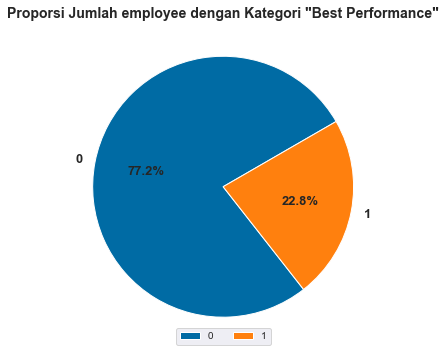

In [187]:
plt.figure(figsize=(6,6))
plt.title('Proporsi Jumlah employee dengan Kategori "Best Performance"', fontsize=14, fontweight='bold')
plt.pie(y3.value_counts(), 
       autopct='%.1f%%', labels=df_train3['Best Performance'].value_counts().index, 
       textprops={'fontsize':13,'fontweight':'bold'}, startangle=30)
plt.legend(loc='lower center', ncol=3)
plt.show()

## Oversampling Dataset

In [188]:
X3.shape

(11152, 22)

In [189]:
y3.shape

(11152,)

In [190]:
y3.value_counts()

0    8614
1    2538
Name: Best Performance, dtype: int64

In [191]:
smot = SMOTE()
X_os3, y_os3 = smot.fit_resample(X3,y3)

In [192]:
X_os3.shape

(17228, 22)

In [193]:
y_os3.value_counts()

1    8614
0    8614
Name: Best Performance, dtype: int64

## Split Dataset

In [194]:
X_train,X_test,y_train,y_test = train_test_split(X_os3, y_os3, test_size=0.3, random_state=42)

In [195]:
X_train.shape

(12059, 22)

In [196]:
X_train.head()

,RM_type_B,RM_type_C,2,Y,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,number_of_dependences,...,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,age_now,year_since_graduated
14040,0,0,1,1,2,2.828427,5,2.281603,1.060918,2,...,17,8,7,5,2,0,72.743865,0.000000,45,21
4274,1,0,1,1,2,1.224745,3,1.224745,1.224745,0,...,4,2,2,0,4,0,85.810000,2.000000,30,7
8460,0,0,1,1,2,1.322876,3,1.322876,0.648074,1,...,7,5,3,4,0,0,55.040000,0.000000,35,12
16514,0,0,1,1,2,1.458275,3,1.458275,1.491449,1,...,5,3,3,5,2,0,106.679873,3.000000,33,10
12558,0,0,0,1,2,1.795580,4,1.456392,1.528599,2,...,14,8,6,0,1,6,85.642262,1.589096,41,17


In [197]:
print(X_train.shape)
print(y_train.shape)

(12059, 22)
(12059,)


In [198]:
print(X_test.shape)
print(y_test.shape)

(5169, 22)
(5169,)


In [199]:
y_test.value_counts()

0    2604
1    2565
Name: Best Performance, dtype: int64

In [200]:
logreg3 = LogisticRegression(solver='newton-cg')

In [201]:
logreg3.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [202]:
pred3 = logreg3.predict(X_test)
pred3

array([1, 1, 1, ..., 1, 0, 1], dtype=int64)

In [203]:
proba3 = logreg3.predict_proba(X_test)
proba3

array([[0.42972778, 0.57027222],
       [0.17020597, 0.82979403],
       [0.14546672, 0.85453328],
       ...,
       [0.37233769, 0.62766231],
       [0.80553636, 0.19446364],
       [0.21630657, 0.78369343]])

In [204]:
print(confusion_matrix(y_test,pred3))

[[2031  573]
 [ 915 1650]]


<Figure size 432x432 with 0 Axes>

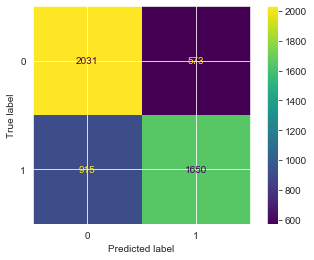

In [205]:
plt.figure(figsize=(6,6))
plot_confusion_matrix(logreg3,X_test,y_test, values_format='d')
plt.show()

In [206]:
print(classification_report(y_test,pred3))

              precision    recall  f1-score   support

           0       0.69      0.78      0.73      2604
           1       0.74      0.64      0.69      2565

    accuracy                           0.71      5169
   macro avg       0.72      0.71      0.71      5169
weighted avg       0.72      0.71      0.71      5169



In [207]:
cv_score = cross_val_score(logreg3,X_test,y_test, cv=10, scoring='accuracy')

In [208]:
cv_score

array([0.70599613, 0.71373308, 0.70599613, 0.69825919, 0.73500967,
       0.72533849, 0.69245648, 0.68858801, 0.72147002, 0.72286822])

In [209]:
cv_score.mean()

0.7109715412412096

In [210]:
proba_best_3 = proba3[:,1]
fpr_3, tpr_3, threshold_3 = roc_curve(y_test, proba_best_3)
roc_auc_logreg3 = auc(fpr_3,tpr_3)

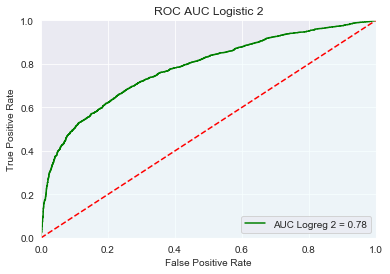

In [211]:
plt.title('ROC AUC Logistic 2')
plt.plot(fpr_3, tpr_3, 'green', label='AUC Logreg 2 = {}'.format(round(roc_auc_logreg3,2)))
plt.plot([0,1],[0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.fill_between(fpr_3,tpr_3, 0, facecolor='azure', alpha=0.5)
plt.legend(loc = 'lower right')

### Import Dataset

In [212]:
data_test2

,RM_type_B,RM_type_C,2,Y,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,number_of_dependences,...,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Last_achievement_%,Achievement_above_100%_during3quartal,age_now,year_since_graduated
0,0,0,0,0,2,1.256981,3,1.256981,0.707107,0,...,6,4,2,6,3,7,84.02,0.0,33,12
1,1,0,1,0,2,1.224745,3,1.224745,1.256981,0,...,2,2,2,0,1,0,63.74,0.0,30,7
2,0,0,1,1,2,0.500000,3,0.500000,1.081665,1,...,4,2,2,0,2,1,88.19,1.0,32,10
3,0,0,1,1,2,1.256981,3,1.256981,1.802776,1,...,3,1,3,0,3,0,25.94,0.0,31,7
4,1,0,0,1,2,1.352775,3,1.352775,1.224745,0,...,5,3,2,0,3,0,82.32,0.0,36,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,1,0,1,1,2,1.292285,3,1.292285,0.707107,0,...,2,2,2,0,4,0,58.60,0.0,33,6
5996,0,0,1,1,2,1.352775,3,1.352775,1.581139,1,...,5,3,2,7,3,0,90.64,3.0,32,10
5997,0,0,1,1,2,1.385641,3,1.385641,1.224745,0,...,3,2,3,0,16,0,13.02,0.0,30,8
5998,0,0,1,1,3,1.385641,5,1.385641,0.648074,2,...,14,7,6,8,2,0,82.26,0.0,41,18


In [213]:
pred_res3 = logreg3.predict(data_test2)
pred_res3

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

In [214]:
proba_res3 = logreg3.predict_proba(data_test2)
proba_res3

array([[0.34424056, 0.65575944],
       [0.69314287, 0.30685713],
       [0.41589401, 0.58410599],
       ...,
       [0.79867028, 0.20132972],
       [0.85944238, 0.14055762],
       [0.61312391, 0.38687609]])

In [215]:
result3 = proba_res3[:,1]
df_result3 = pd.DataFrame(result3, columns=['Best Performance'])
df_result3.reset_index(inplace=True)

In [216]:
df_result3

,index,Best Performance
0,0,0.655759
1,1,0.306857
2,2,0.584106
3,3,0.316461
4,4,0.416528
...,...,...
5995,5995,0.287693
5996,5996,0.763256
5997,5997,0.201330
5998,5998,0.140558


In [217]:
df_result3.to_csv('Submission-LabelEncoder-Manipulate-Y.csv', index=False)